In [93]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import seaborn as sns 
import numpy as np

In [94]:
df=pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [96]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [97]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [98]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

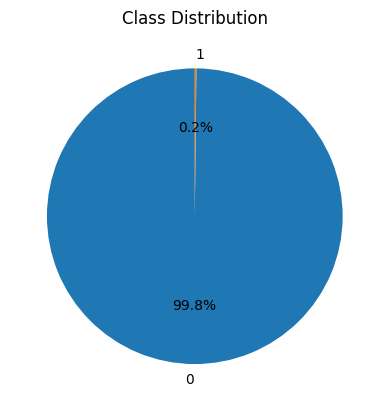

In [99]:
# Create the pie chart with labels and percentages
plt.pie(df['Class'].value_counts(), 
        labels=df['Class'].value_counts().index,  # Labels corresponding to each class
        autopct='%1.1f%%',  # Format to display percentage with 1 decimal place
        startangle=90)  # Optional: rotates the pie chart for better readability

# Add a title
plt.title('Class Distribution')

# Display the pie chart
plt.show()


In [100]:
fraud = df[df['Class'] == 1]
non_fraud = df[df['Class'] == 0]

In [101]:
# compare the values for both transactions
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [102]:
non_fraud = non_fraud.sample(n=492)
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [103]:
df=pd.concat(  [non_fraud, fraud],axis=0)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
154463,101656.0,2.057364,0.039026,-1.314395,0.367509,0.272958,-0.776838,0.050279,-0.309803,1.664461,...,0.120732,0.720500,-0.049638,-0.432998,0.262720,-0.142390,-0.051750,-0.079035,3.74,0
24301,33165.0,0.870216,-0.897987,2.085341,1.365784,-1.852107,0.700721,-1.280975,0.452695,1.950972,...,0.165281,0.849512,-0.099885,0.709065,0.250681,0.599598,0.069896,0.046401,90.00,0
137147,82035.0,-0.686633,1.343840,0.507474,0.717874,0.253535,-0.336867,0.570970,0.290473,-0.819935,...,0.131973,0.404465,-0.157774,-0.428163,-0.011766,-0.267656,0.289731,0.146753,36.00,0
49219,43959.0,-0.358457,0.846262,1.664134,1.433091,0.118290,-0.088831,0.388008,0.072454,-0.694132,...,0.074843,0.230351,-0.046966,0.068812,-0.311306,-0.230030,0.174766,0.141467,18.98,0
296,211.0,0.263523,-1.812897,-0.311087,0.412930,-0.794605,0.196365,0.416626,-0.062991,0.345392,...,0.002672,-1.042342,-0.480538,-0.414743,0.111706,0.819590,-0.168906,0.078203,526.96,0


In [104]:
df['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [105]:
X = df.drop(['Class'], axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


In [106]:
cols = X_train.columns

C:\Users\ghass\AppData\Local\Temp\ipykernel_14528\1107853007.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\ghass\AppData\Local\Temp\ipykernel_14528\1107853007.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\ghass\AppData\Local\Temp\ipykerne

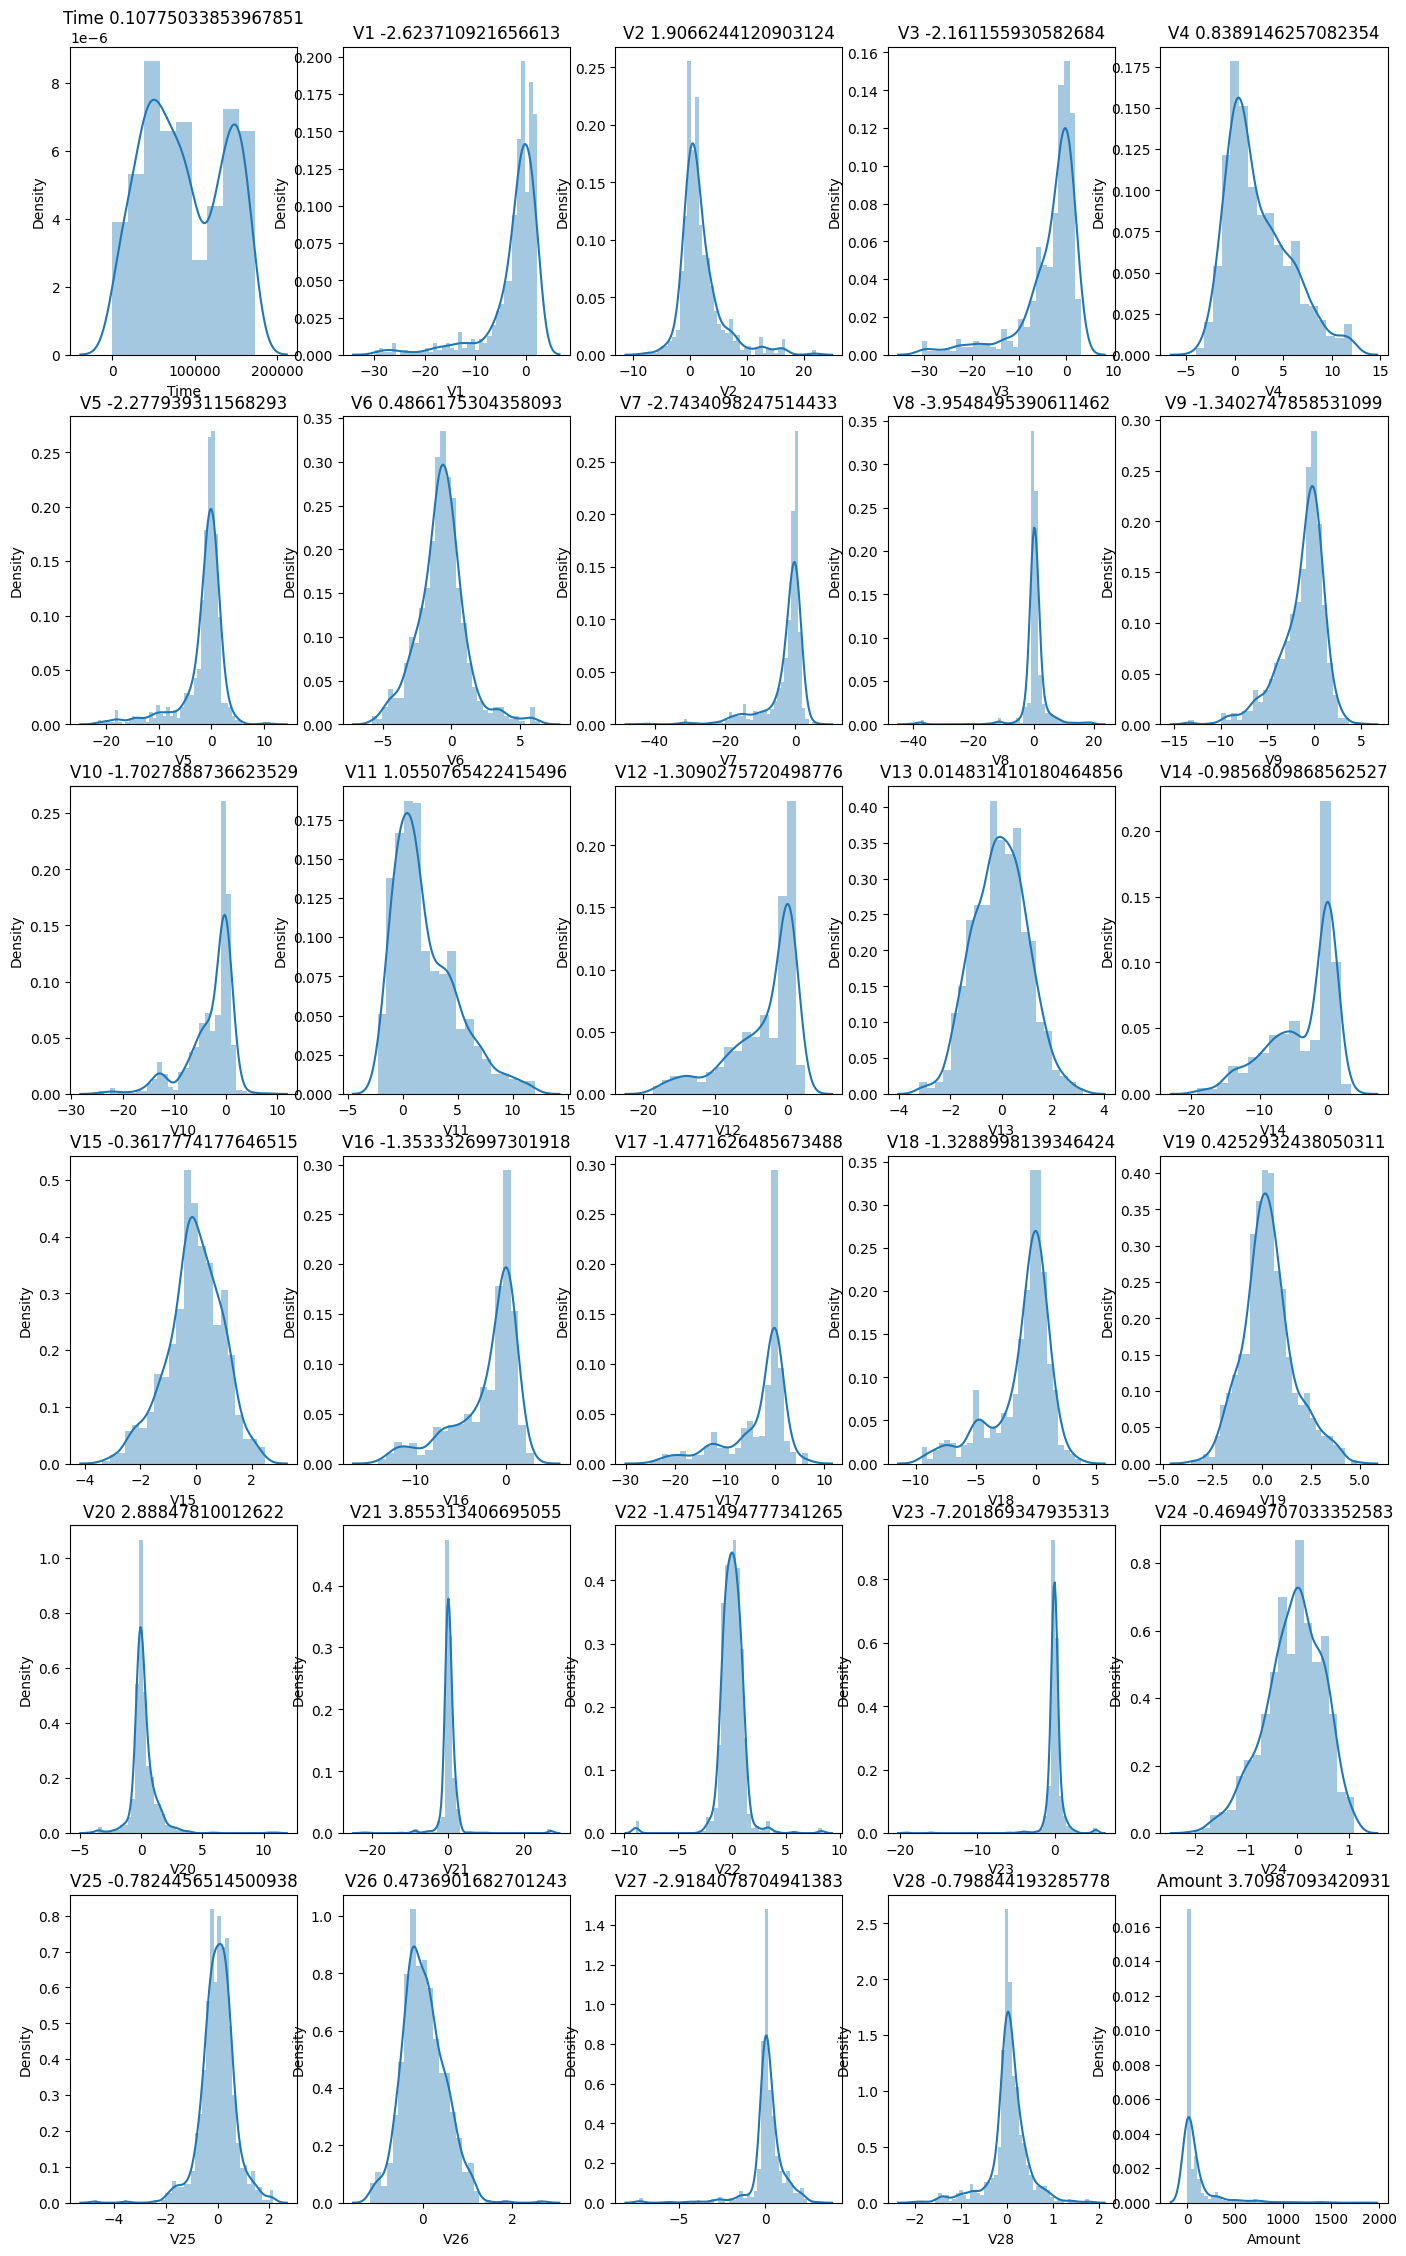

In [107]:
# Plotting the distribution of the variables (skewness) of all the columns
i=0
plt.figure(figsize=(17,28))
for col in cols :    
    i=i+1
    plt.subplot(6, 5,i)    
    sns.distplot(X_train[col])
    plt.title(col+' '+str(X_train[col].skew()))

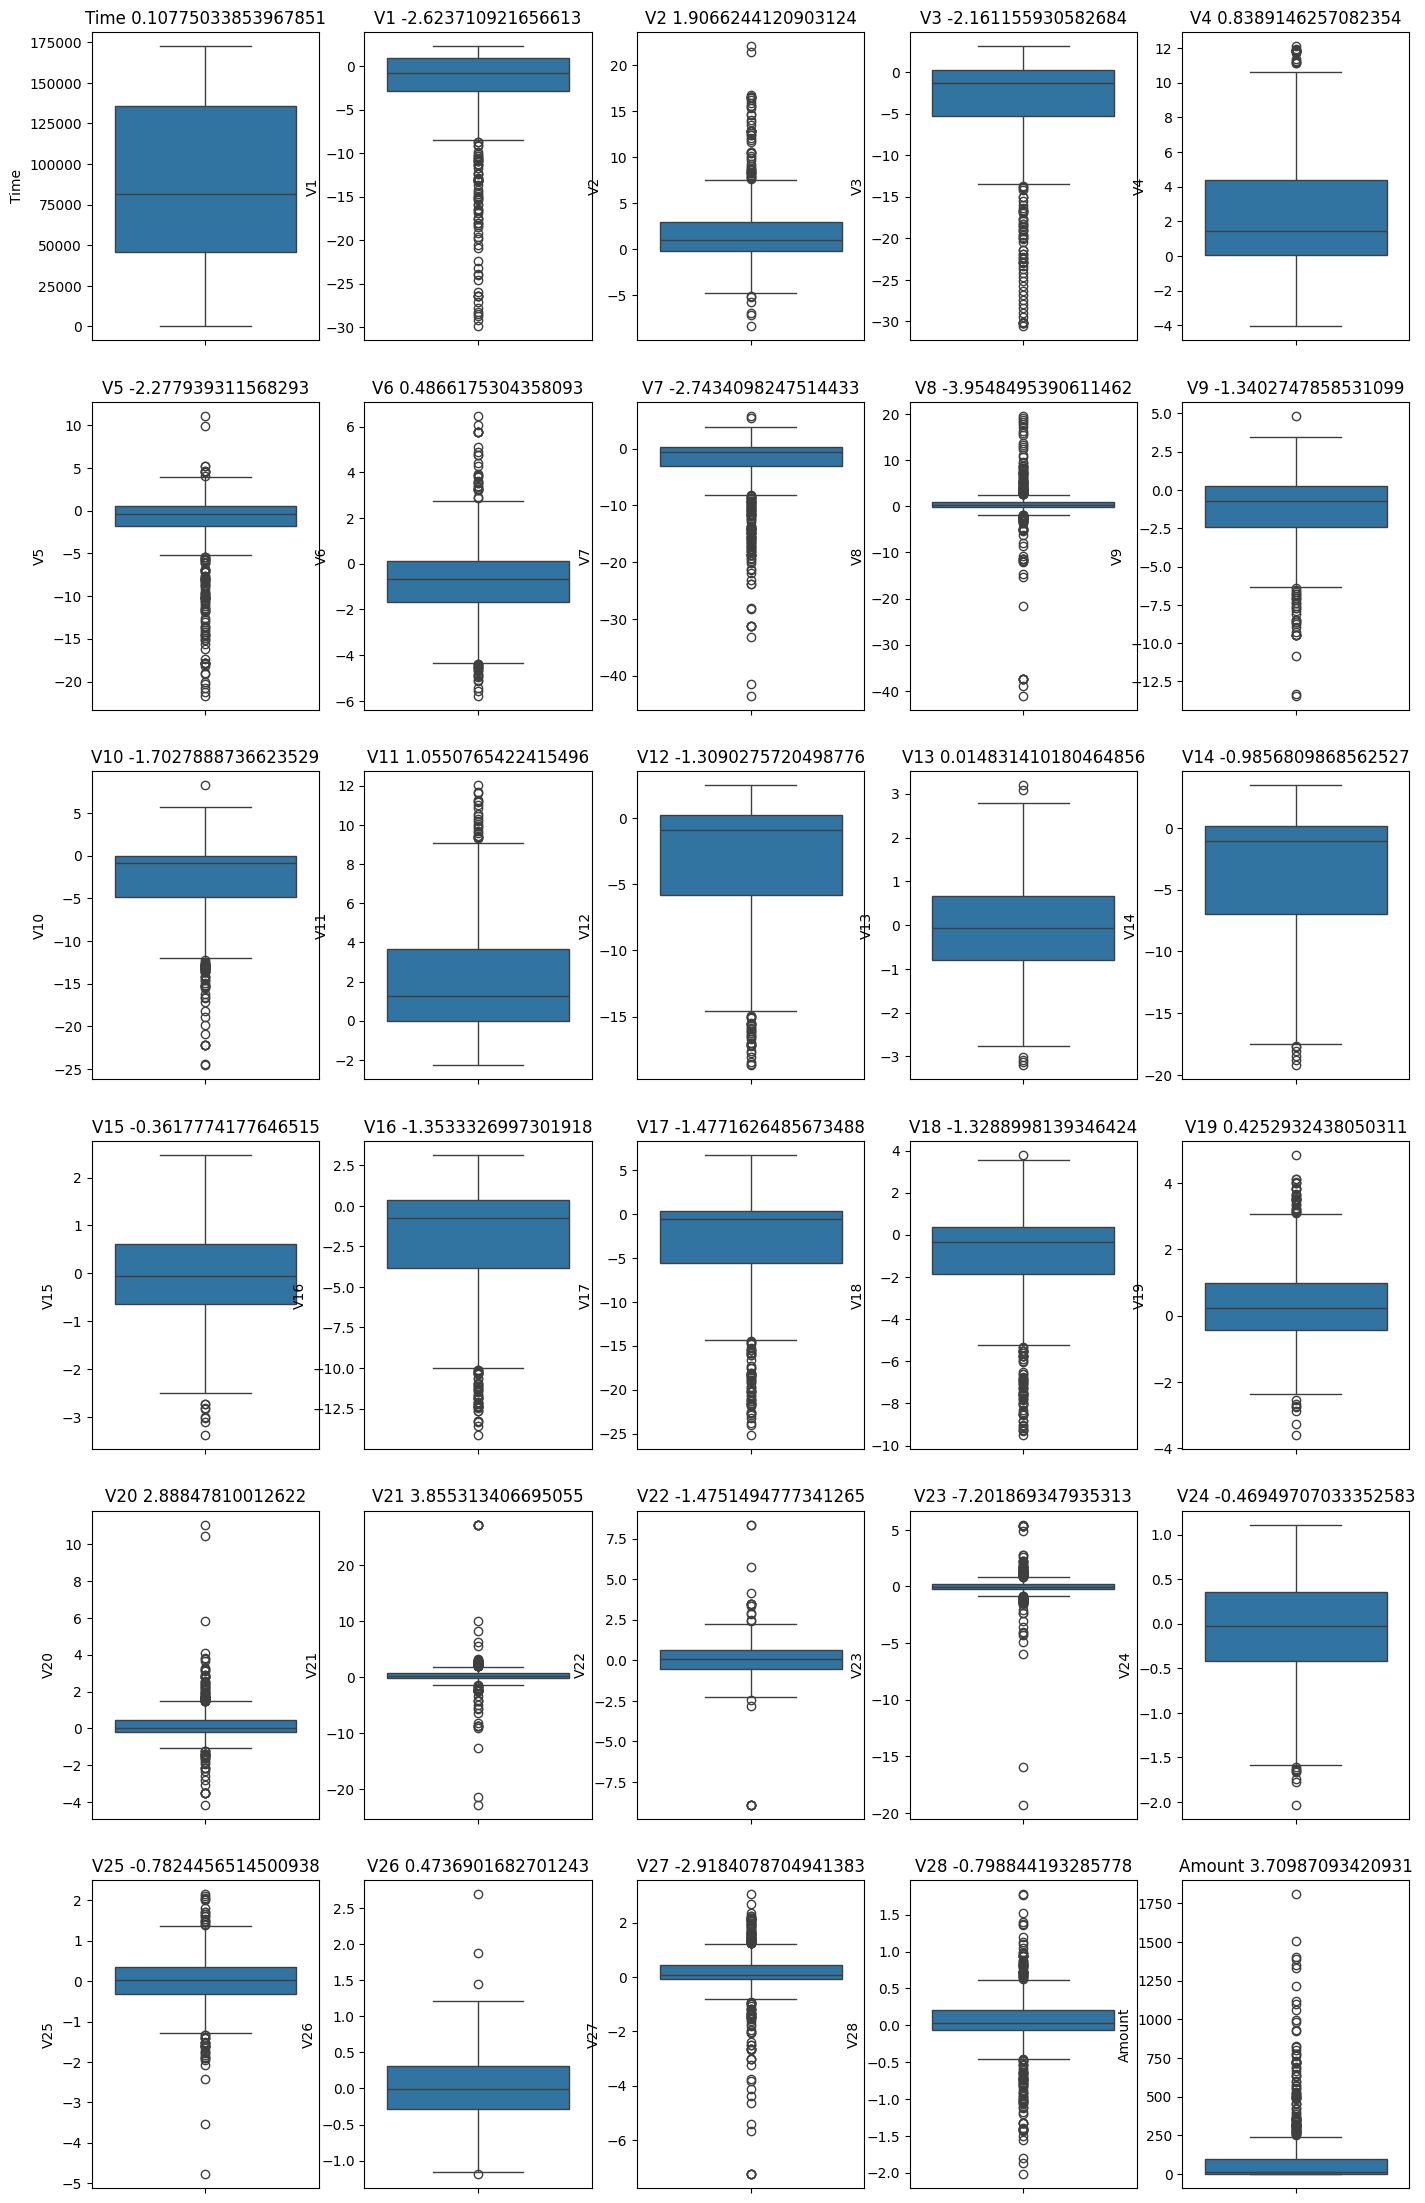

In [108]:
# Plotting the distribution of the variables (skewness) of all the columns
i=0
plt.figure(figsize=(17,28))
for col in cols :    
    i=i+1
    plt.subplot(6, 5,i)    
    sns.boxplot(X_train[col])
    plt.title(col+' '+str(X_train[col].skew()))

In [109]:
# Instantiate the powertransformer
pt = PowerTransformer(method='yeo-johnson', standardize=True, copy=False)
# Fit and transform the PT on training data
X_train[cols] = pt.fit_transform(X_train)
# Transform the test set
X_test[cols] = pt.transform(X_test)

C:\Users\ghass\AppData\Local\Temp\ipykernel_14528\1107853007.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\ghass\AppData\Local\Temp\ipykernel_14528\1107853007.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\ghass\AppData\Local\Temp\ipykerne

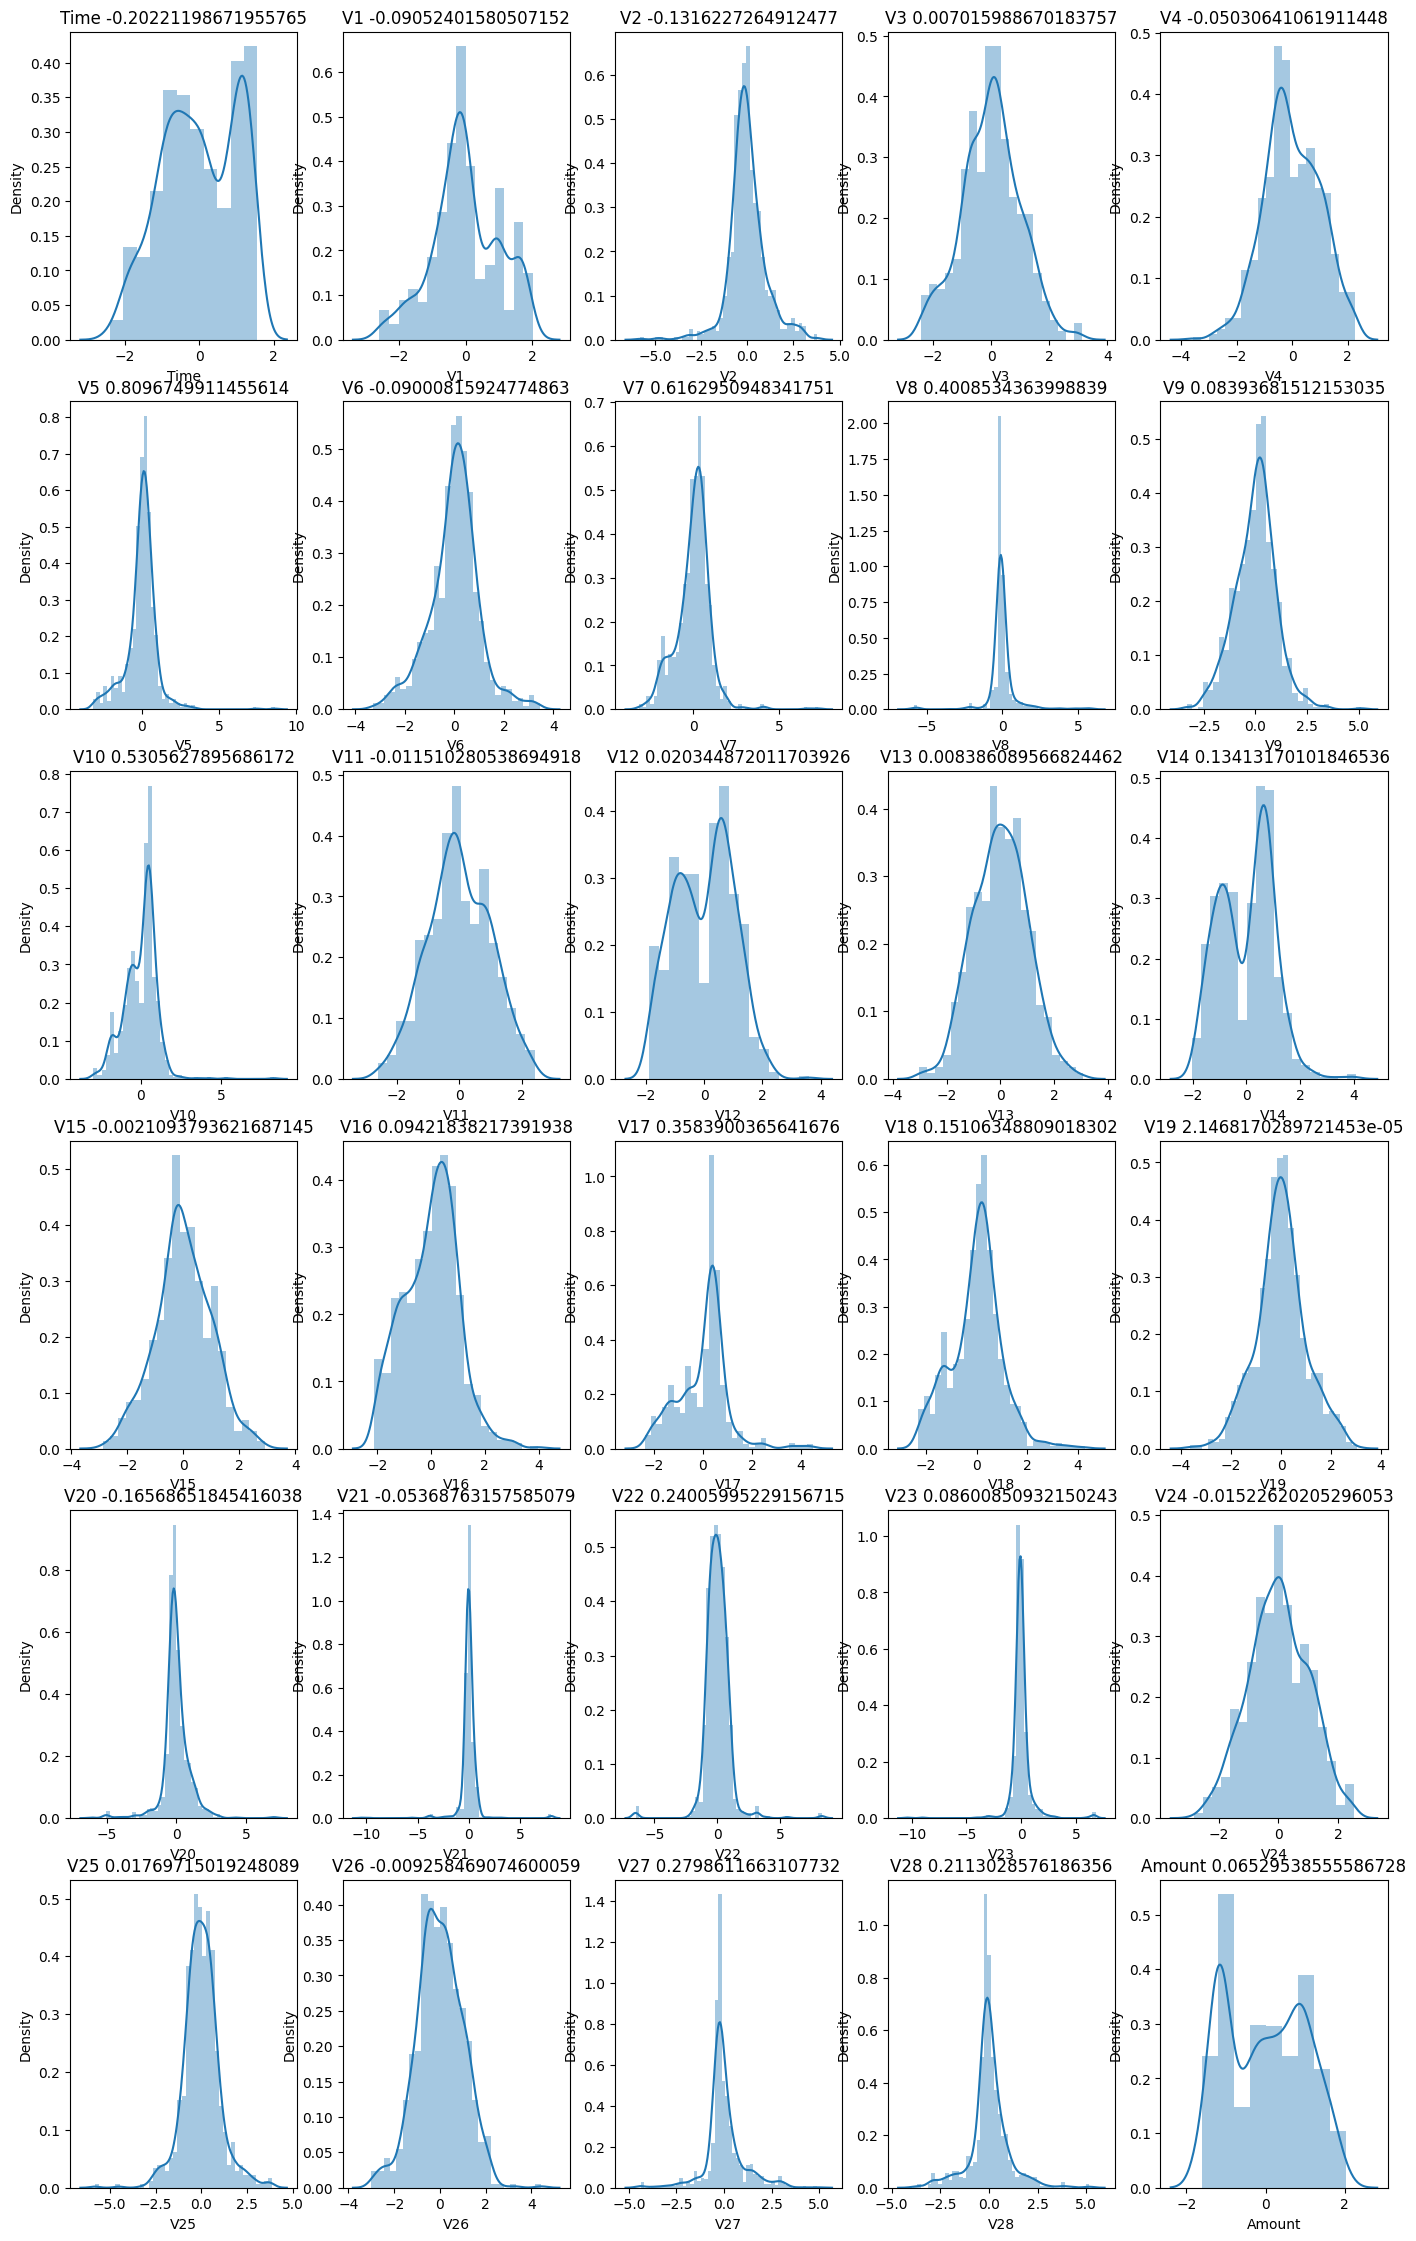

In [110]:
# Plotting the distribution of the variables (skewness) of all the columns
i=0
plt.figure(figsize=(17,28))
for col in cols :    
    i=i+1
    plt.subplot(6, 5,i)    
    sns.distplot(X_train[col])
    plt.title(col+' '+str(X_train[col].skew()))

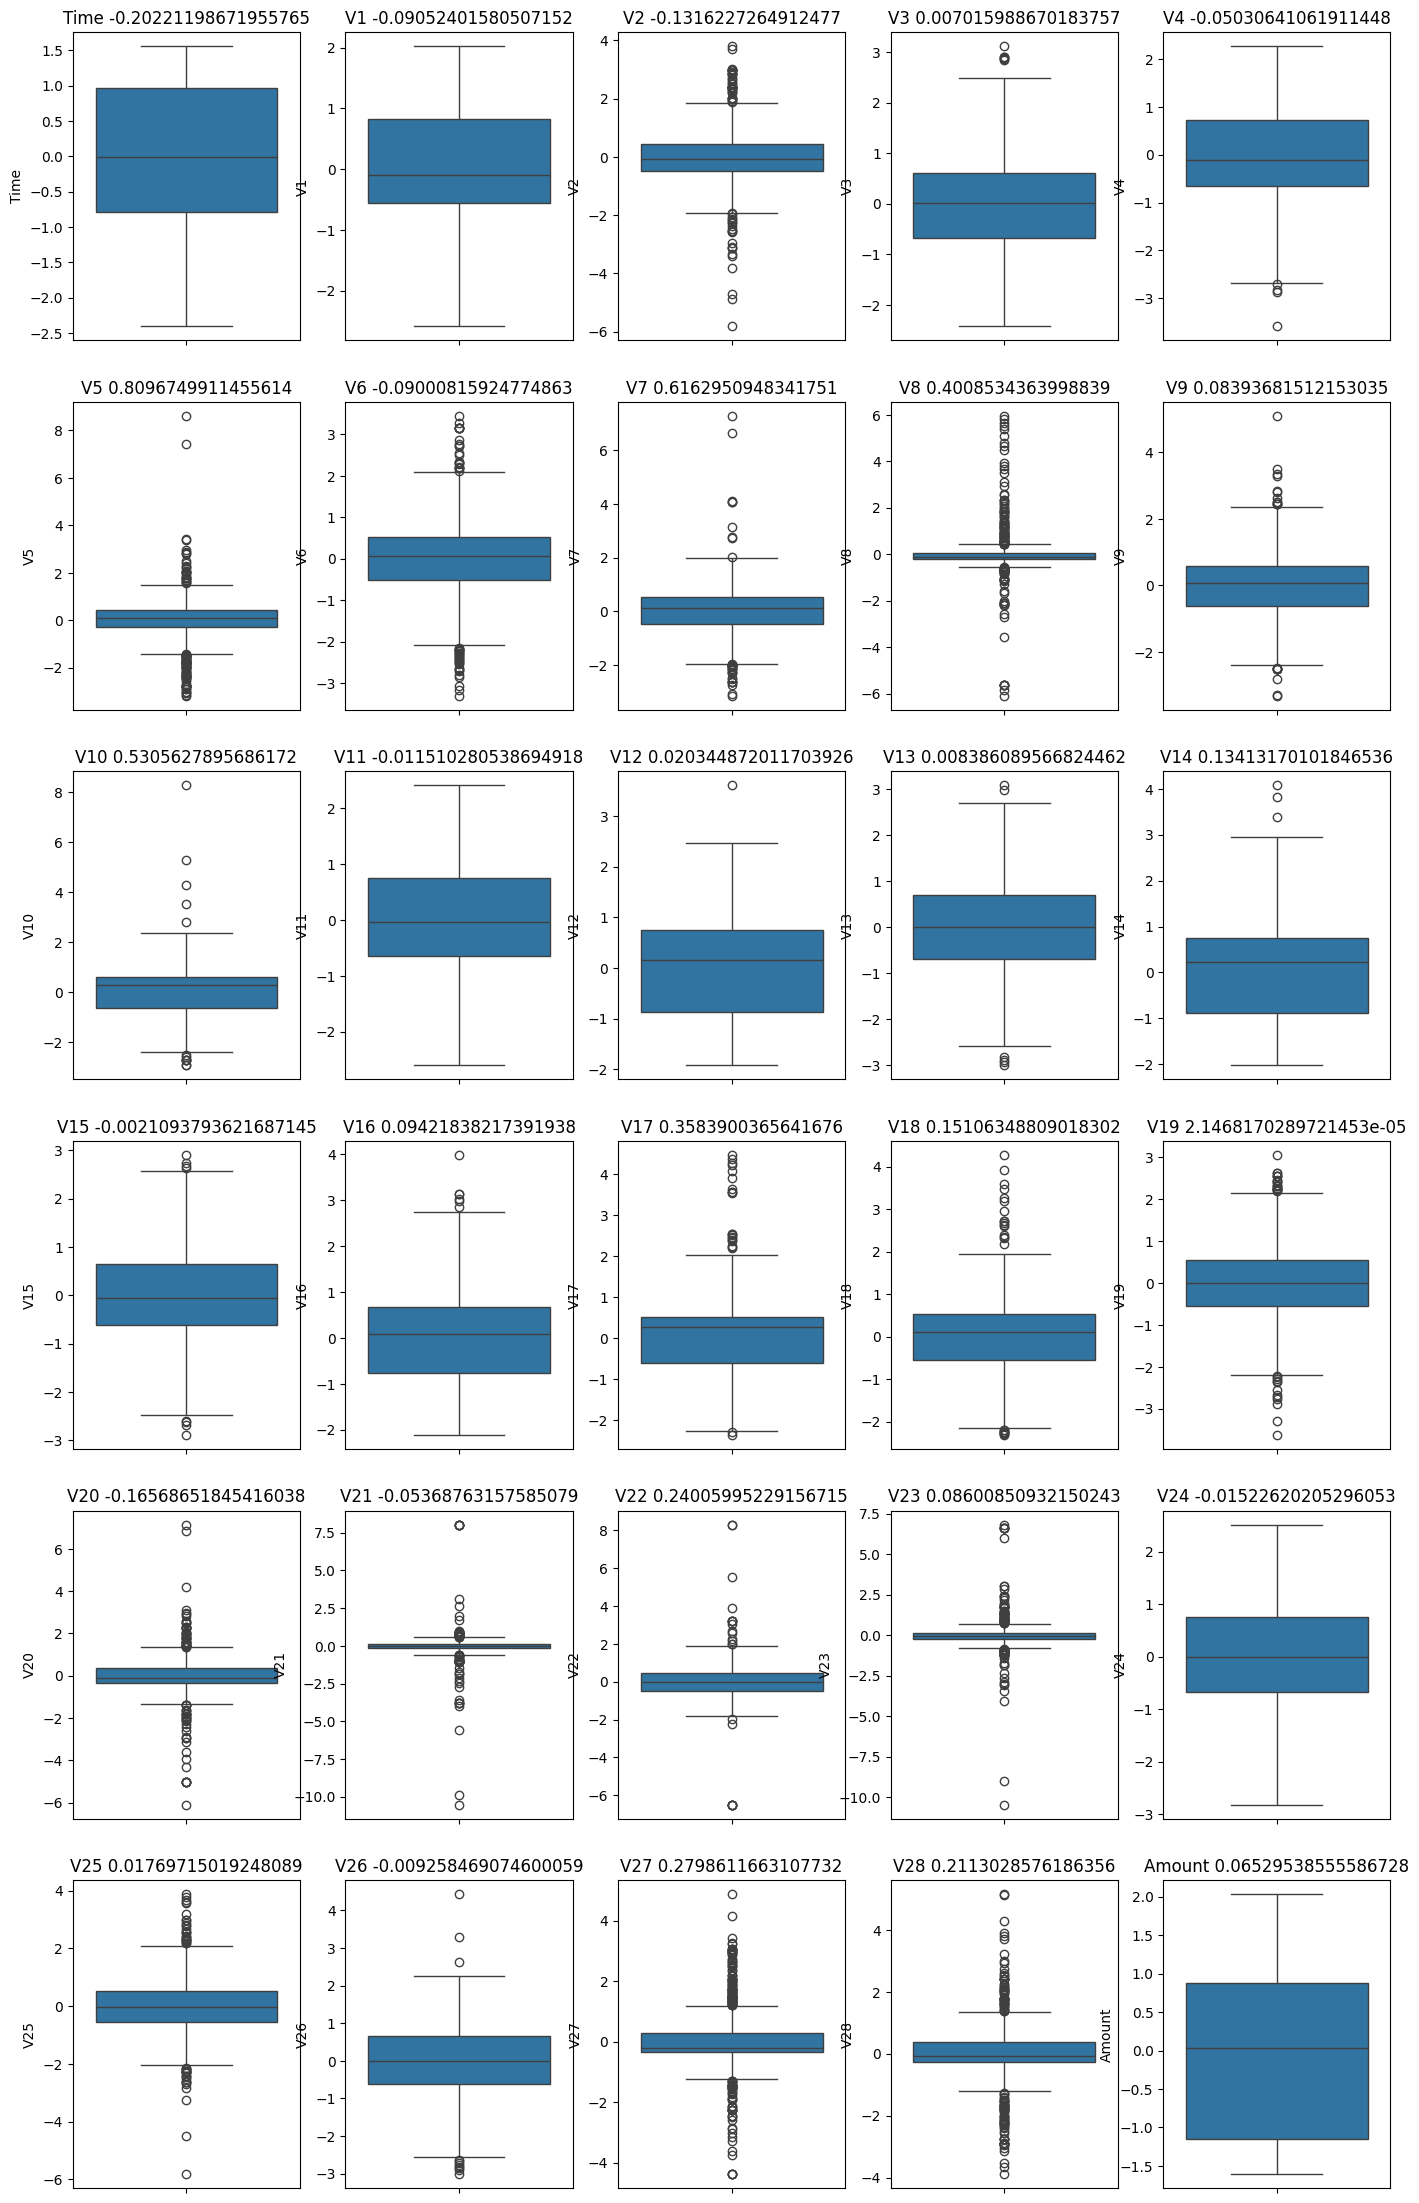

In [111]:
# Plotting the distribution of the variables (skewness) of all the columns
i=0
plt.figure(figsize=(17,28))
for col in cols :    
    i=i+1
    plt.subplot(6, 5,i)    
    sns.boxplot(X_train[col])
    plt.title(col+' '+str(X_train[col].skew()))

In [112]:
# Function to print evaluation metrics
from sklearn.metrics import classification_report


# Function to develop and evaluate a model
def develop_model(model, X_train, y_train, X_test, y_test):
    # Dictionary to store evaluation metrics
    evaulation_metrics = {}
    
    # Train the model with the training data
    model.fit(X_train, y_train)
    
    # Predict on both training and test sets
    model_pred_train = model.predict(X_train)
    model_pred_test = model.predict(X_test)
    
    # Calculate evaluation metrics for the training set
    model_accuracy_train = accuracy_score(y_train, model_pred_train)
    model_precision_train = precision_score(y_train, model_pred_train)
    model_recall_train = recall_score(y_train, model_pred_train)
    model_f1_train = f1_score(y_train, model_pred_train)
    model_cm_train = confusion_matrix(y_train, model_pred_train)
    
    # Store training metrics in the dictionary
    evaulation_metrics['train'] = [model_accuracy_train, model_precision_train, model_recall_train, model_f1_train, model_cm_train]
    
    # Calculate evaluation metrics for the test set
    model_accuracy_test = accuracy_score(y_test, model_pred_test)
    model_precision_test = precision_score(y_test, model_pred_test)
    model_recall_test = recall_score(y_test, model_pred_test)
    model_f1_test = f1_score(y_test, model_pred_test)
    model_cm_test = confusion_matrix(y_test, model_pred_test)
    
    # Store test metrics in the dictionary
    evaulation_metrics['test'] = [model_accuracy_test, model_precision_test, model_recall_test, model_f1_test, model_cm_test]
    
    # Return the evaluation metrics for both training and test sets
    return evaulation_metrics


In [113]:
def print_metrics(evaluation_metrics):
    
    print("  Accuracy:", evaluation_metrics[0])
    print("  Precision:", evaluation_metrics[1])
    print("  Recall:", evaluation_metrics[2])
    print("  F1-Score:", evaluation_metrics[3])
    print("  Confusion Matrix:")
    print(evaluation_metrics[4])

In [114]:
logreg = LogisticRegression()

# Call the develop_model function to train the model and evaluate it on the training and test data
logreg_evaluation_metrics = develop_model(logreg, X_train, y_train, X_test, y_test)

In [115]:
dtree = DecisionTreeClassifier()
dtree_evaluation_metrics = develop_model(dtree, X_train, y_train, X_test, y_test)

#random forest
rf = RandomForestClassifier()
rf_evaluation_metrics = develop_model(rf, X_train, y_train, X_test, y_test)

#support vector machines
svm = SVC()
svm_evaluation_metrics = develop_model(svm, X_train, y_train, X_test, y_test)

In [116]:
# Print the evaluation metrics for the logistic regression model on the training set
print("Logistic Regression Train:")
print_metrics(logreg_evaluation_metrics['train'])

# Print the evaluation metrics for the logistic regression model on the test set
print("Logistic Regression Test:")
print_metrics(logreg_evaluation_metrics['test'])


Logistic Regression Train:
  Accuracy: 0.9618805590851334
  Precision: 0.9843342036553525
  Recall: 0.940149625935162
  F1-Score: 0.9617346938775511
  Confusion Matrix:
[[380   6]
 [ 24 377]]
Logistic Regression Test:
  Accuracy: 0.9238578680203046
  Precision: 0.9418604651162791
  Recall: 0.8901098901098901
  F1-Score: 0.9152542372881356
  Confusion Matrix:
[[101   5]
 [ 10  81]]


In [117]:
# Print the evaluation metrics for the decision tree model on the training set
print("Decision Tree Train:")
print_metrics(dtree_evaluation_metrics['train'])

# Print the evaluation metrics for the decision tree model on the test set
print("Decision Tree Test:")
print_metrics(dtree_evaluation_metrics['test'])


Decision Tree Train:
  Accuracy: 1.0
  Precision: 1.0
  Recall: 1.0
  F1-Score: 1.0
  Confusion Matrix:
[[386   0]
 [  0 401]]
Decision Tree Test:
  Accuracy: 0.9035532994923858
  Precision: 0.9
  Recall: 0.8901098901098901
  F1-Score: 0.8950276243093923
  Confusion Matrix:
[[97  9]
 [10 81]]


In [118]:
# Print the evaluation metrics for the random forest model on the training set
print("Random Forest Train:")
print_metrics(rf_evaluation_metrics['train'])

# Print the evaluation metrics for the random forest model on the test set
print("Random Forest Test:")
print_metrics(rf_evaluation_metrics['test'])


Random Forest Train:
  Accuracy: 1.0
  Precision: 1.0
  Recall: 1.0
  F1-Score: 1.0
  Confusion Matrix:
[[386   0]
 [  0 401]]
Random Forest Test:
  Accuracy: 0.9390862944162437
  Precision: 0.9647058823529412
  Recall: 0.9010989010989011
  F1-Score: 0.9318181818181818
  Confusion Matrix:
[[103   3]
 [  9  82]]


In [119]:
# Print the evaluation metrics for the support vector machine (SVM) model on the training set
print("Support Vector Machines Train:")
print_metrics(svm_evaluation_metrics['train'])

# Print the evaluation metrics for the support vector machine (SVM) model on the test set
print("Support Vector Machines Test:")
print_metrics(svm_evaluation_metrics['test'])


Support Vector Machines Train:
  Accuracy: 0.9542566709021602
  Precision: 0.9919137466307277
  Recall: 0.9177057356608479
  F1-Score: 0.9533678756476683
  Confusion Matrix:
[[383   3]
 [ 33 368]]
Support Vector Machines Test:
  Accuracy: 0.9289340101522843
  Precision: 0.9529411764705882
  Recall: 0.8901098901098901
  F1-Score: 0.9204545454545454
  Confusion Matrix:
[[102   4]
 [ 10  81]]
